# Fitten mit Python
Nachdem wir nun wissen, wie wir mit Python Messdaten auslesen und plotten können, können wir uns als nächstes dem Fitten widmen. 

## Notwendige Pakete importieren
Zuerst importieren wir ein paar **Pakete**, die uns das Leben leichter machen. Falls ihr Fragen zu den Paketen oder den Funktionen daraus habt, wendet euch einfach an uns. Ansonsten reicht es meistens, den **Paketnamen** zusammen mit dem **Funktionsnamen** zu googlen, um die Dokumentation oder ein paar Anwendunsgbeispiele im Internet zu finden.

In [2]:
# numpy für vordefinierte Formeln wie pow, sin, exp, etc.
import numpy as np

# pyplot für's Plotten
import matplotlib.pyplot as plt

# scipy's optimize für's Fitten
from scipy import optimize

## Daten auslesen
Als nächstes müssen wir die Daten auslesen. Dieser Schritt ist genau wie im **Plotting-Notebook**.

In [14]:
# Datenauslese
fname = '1_3.txt'

xarr = np.loadtxt(fname, float, usecols=0, delimiter=',')
yarr   = np.loadtxt(fname, float, usecols=1, delimiter=',')
yerror = np.loadtxt(fname, float, usecols=2, delimiter=',')

## Fit-Funktion definieren
Als nächstes bereiten wir die sogenannte **Fit-Funktion** vor. Dies ist die Funktion, die wir an unsere ausgelesenen Messdaten fitten (anpassen) wollen. Was für eine Funktion man für die Fits verwenden muss, geht dabei aus der Theorie hervor. Wenn man zB einen unbekannten **Widerstand R** bestimmen möchte, misst man dazu den **Strom I** und trägt diesen gegen die angelegte **Spannung U** auf. Aus der Theorie weiß man, dass die Funktion die Form

$$I = U/R$$

haben sollte. Also eine lineare Funktion der Form $f(x) = m*x$ mit I = f(x), U = x und (1/R) = m. Damit können wir unsere Fit-Funktion definieren, wobei x immer das erste Argument in der Definition sein muss, während alle weiteren Argumente unbekannte **Fit-Parameter** sind:

In [19]:
# Definieren der Fit-Funktion
def fit_func(x, m, b):
    return m * x +b

Ein beliebter Fehler ist es hierbei, einfach eine hochgradige Polynom-Funktion an seine Messdaten zu fitten. Das erzeugt zwar eine Messkurve, die sich perfekt an den Messdaten entlangschlängelt, hat aber so ziemlich gar keinen Aussagewert.

## Das Fitten
Jetzt der wichtigste Teil: Das eigentliche Fitten. Für die meisten Fits könnt ihr die hier gezeigten Code-Snippets ein wenig umschreiben und wiederverwenden, aber es gibt ein paar Kleinigkeiten, auf die man dabei achten muss:

Als erstes rufen wir die **curve_fit function** aus dem optimize Paket auf. Diese Funktion fittet die Parameter einer vordefinierten Fit-Funktion auf die übergebenen Messdaten nach der sogenannten **$\chi^2$-Methode** (die müsst ihr nicht jetzt verstehen, aber es ist gut das mal gehört zu haben). Die **Funktionsparameter** sind dabei eure vorhin definierte Fit-Funktion, das x- und y-Datenarray welches ihr am Anfang ausgelesen habt, und eine Liste von Startparametern. Hierbei ist es **wichtig, dass die Startparameter-Liste genau so viele Einträge enthält, wie es unbekannte Parameter in eurer Fit-Funktion gibt**.

Die **curve_fit function** gibt nach dem Durchlaufen 2 Ergebnis-Arrays raus: Das für die **Parameter**, und das für die Kovarianz-Matrix der Paramter (muss euch noch nichts sagen). Möchte man die absoluten Fehler der Paramter erhalten, so muss man die Wurzel der Diagonal-Elemente dieser Matrix berechnen (np.sqrt(params_covariance[i][i]) für den i-ten Parameter). Diese entsprechen dann der Standardabweichung und damit den Fehlern der einzelnen Parameter. Denkt daran, dass diese Ergebnisse noch wissenschaftlich gerundet werden müssen.

In [21]:
# Aufruf der Fittenden-Funktion von optimize
params, params_covariance = optimize.curve_fit(fit_func, xarr, yarr, p0=[])

# Die Ergebnisse des Fits printen
for i in range(0, len(params)):
    print(str(params[i]) + " +- " + str(np.sqrt(params_covariance[i][i])))


TypeError: fit_func() missing 1 required positional argument: 'b'

## Figure-Objekt vorbereiten
Ähnlich wie im **Plotting-Notebook**, bereiten wir das Figure-Objekt für die Plots *und* die Fits vor. Der einzige Unterschied ist, dass wir diesmal die Fit-Funktion mit zu den Messdaten plotten. Dazu übergeben wir der plot-Funktion das x-Datenarray, und die Fit-Funktion zusammen mit den gefitteten Paramtern:

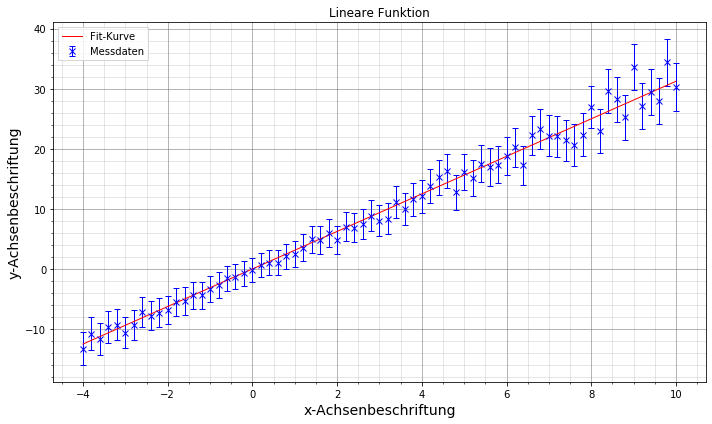

In [5]:
# figure object erzeugen
plt.figure(figsize=(10,6))

# gridlines erzeugen (wie man sieht, gibt es zig Möglichkeiten diese zu Zeichnen)
plt.minorticks_on()
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.3)

# Achsenbeschriftungen
plt.xlabel("x-Achsenbeschriftung", fontsize="14")
plt.ylabel("y-Achsenbeschriftung", fontsize="14")

# Titel für den Plot
plt.title("Lineare Funktion")

# Für einen ordentlichen Funktionsplot erzeugen wir ein Array,
# das die selben Grenzen wie die eingelesenen Messdaten hat,
# aber mehr Datenpunkte besitzt (sonst wird's eckig)
xlo = xarr[0]
xhi = xarr[len(xarr)-1]
xplot = np.linspace(xlo, xhi, int(1e5), endpoint=True)

# Messdaten plotten
plt.errorbar(xarr, yarr, yerror, fmt='x', color="blue", linewidth=1, ecolor="blue", capsize=3, label="Messdaten")
# Fit-Kurve plotten
plt.plot(xplot, fit_func(xplot, *params), color='red', linewidth=1, label="Fit-Kurve")

# Darstellung der Legende
plt.legend(fancybox=False, loc="best")

# Bild zuschneiden, abspeichern
plt.tight_layout()
plt.savefig("LineareFunktion.pdf")
plt.show()

## Anpassungen für weitere+kompliziertere Fit-Funktionen
Auch für wesentlich kompliziertere Fit-Funktionen bleibt die Prozedur quasi die Selbe. Betrachten wir dazu einmal die Funktion:

$$f(t) = A \cdot sin\,(t\,\omega) + m\,t + b$$

Die dazugehörigen Messdaten befinden sich in der Datei *rising_sin.txt*:

In [6]:
# Datenauslese
fname = "rising_sin.txt"
xarr   = np.loadtxt(fname, float, usecols=0)
yarr   = np.loadtxt(fname, float, usecols=1)
yerror = np.loadtxt(fname, float, usecols=2)

Neben dem veränderten Dateinamen, müssen wir auch eine neue Fit-Funktion definieren:

In [7]:
# Definieren der Fit-Funktion
def fit_func(t, A, w, m, b):
    return A*(np.sin(w*t)) + m*t + b

Das letzte, was jetzt noch geändert werden muss, ist das Startparameter-Array, welches nun 4 Elemente braucht:

In [8]:
# Aufruf der Fittenden-Funktion von optimize
params, params_covariance = optimize.curve_fit(fit_func, xarr, yarr, p0=[2,2,2,2])

Und alles weitere bleibt exakt gleich:

13.551296494763298 +- 0.27917512319427196
2.0056041072499333 +- 0.0041637991599567555
6.015793153058307 +- 0.0495831599788144
7.882766413173304 +- 0.24611384942328912


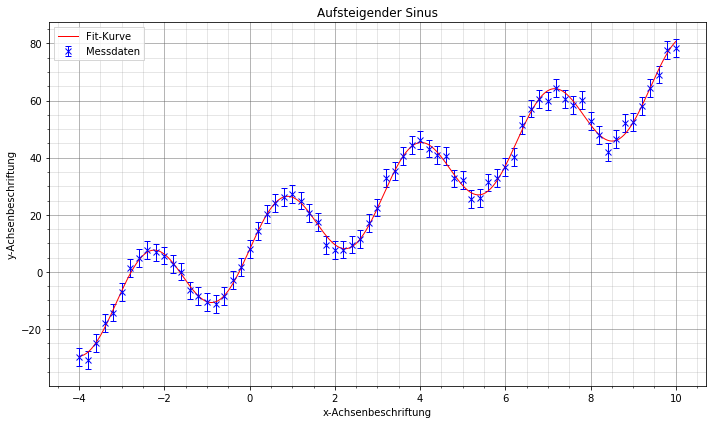

In [9]:
# Die Ergebnisse des Fits printen
for i in range(0, len(params)):
    print(str(params[i]) + " +- " + str(np.sqrt(params_covariance[i][i])))
    
# figure object erzeugen
plt.figure(figsize=(10,6))

# gridlines erzeugen (wie man sieht, gibt es zig Möglichkeiten diese zu Zeichnen)
plt.minorticks_on()
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.3)

# Achsenbeschriftungen
plt.xlabel("x-Achsenbeschriftung")
plt.ylabel("y-Achsenbeschriftung")

# Titel für den Plot
plt.title("Aufsteigender Sinus")

# Funktionsplot Array erzeugen
xlo = xarr[0]
xhi = xarr[len(xarr)-1]
xplot = np.linspace(xlo, xhi, 1e5, endpoint=True)

# Messdaten plotten
plt.errorbar(xarr, yarr, yerror, fmt='x', color="blue", linewidth=1, ecolor="blue", capsize=3, label="Messdaten")
# Fit-Kurve plotten
plt.plot(xplot, fit_func(xplot, *params), color='red', linewidth=1, label="Fit-Kurve")

# Darstellung der Legende
plt.legend(fancybox=False, loc="best")

plt.tight_layout()
plt.savefig("AufsteigenderSinus.pdf")
plt.show()

Hierbei muss man beachten, dass es im Fall von periodischen Funktionen (wie Sinus) mehrere Frequenzen $\omega$ gibt, die eine "gut passende" Fit-Kurve erzeugen. Wie "gut" diese dann wirklich passen, sieht man spätestens beim Plotte:

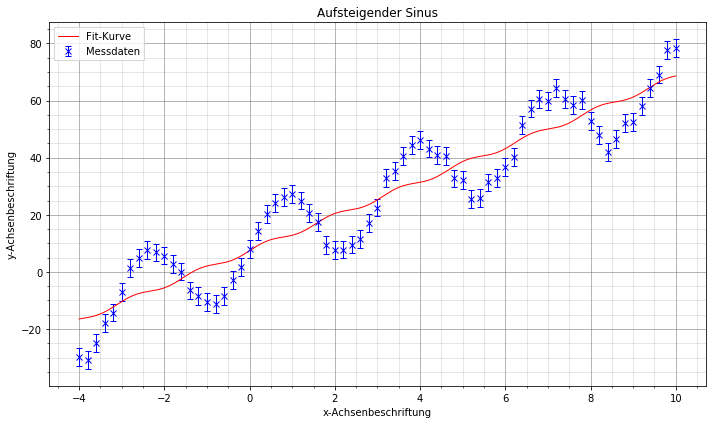

In [10]:
# Aufruf der Fittenden-Funktion von optimize
params, params_covariance = optimize.curve_fit(fit_func, xarr, yarr, p0=[2,4,2,2])

# figure object erzeugen
plt.figure(figsize=(10,6))

# gridlines erzeugen (wie man sieht, gibt es zig Möglichkeiten diese zu Zeichnen)
plt.minorticks_on()
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.3)

# Achsenbeschriftungen
plt.xlabel("x-Achsenbeschriftung")
plt.ylabel("y-Achsenbeschriftung")

# Titel für den Plot
plt.title("Aufsteigender Sinus")

# Funktionsplot Array erzeugen
xlo = xarr[0]
xhi = xarr[len(xarr)-1]
xplot = np.linspace(xlo, xhi, 1e5, endpoint=True)

# Messdaten plotten
plt.errorbar(xarr, yarr, yerror, fmt='x', color="blue", linewidth=1, ecolor="blue", capsize=3, label="Messdaten")
# Fit-Kurve plotten
plt.plot(xplot, fit_func(xplot, *params), color='red', linewidth=1, label="Fit-Kurve")

# Darstellung der Legende
plt.legend(fancybox=False, loc="best")

plt.tight_layout()
plt.savefig("AufsteigenderSinus_Misserfolg.pdf")
plt.show()

In solchen Fällen muss man etwas mit den Startparametern herumspielen, bis man ein Ergebnis erhält das wirklich gut passt.